In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

# CAHOOTS data:

In [3]:
cahoots_data = pd.read_csv('cahoots_data.csv')
cahoots_data = cahoots_data.drop(columns='Language')
cahoots_data

,Date,TimeOfCall,Age,Gender,Race,City,Reason for Dispatch
0,1/1/2023,0:05:33,57,Female,White,Eugene,Public Assist
1,1/1/2023,0:05:00,Not Given,Male,NaN,Eugene,Check Welfare
2,1/1/2023,1:09:51,Not Given,Female,NaN,Eugene,Information Not Available
3,1/1/2023,1:33:15,Not Given,Female,NaN,Eugene,Public Assist
4,1/1/2023,1:45:30,67,Female,White,Eugene,Public Assist
...,...,...,...,...,...,...,...
19565,12/31/2023,9:33:35 PM,Not Given,Chose not to disclose,White,Springfield,Information Not Available
19566,12/31/2023,9:51:35 PM,Not Given,Chose not to disclose,NaN,Informatio not recorded,Information Not Available
19567,12/31/2023,9:58:10 PM,17,Chose not to disclose,White,Eugene,Information Not Available
19568,12/31/2023,10:15:00 PM,17,Chose not to disclose,White,Eugene,Information Not Available


## Gender:

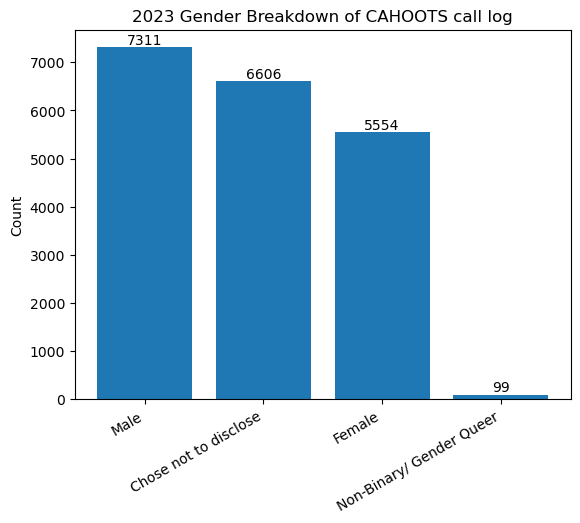

In [30]:
cahoots_data['Gender'] = cahoots_data['Gender'].replace('female', 'Female')
cahoots_data['Gender'] = cahoots_data['Gender'].replace('FEMALE', 'Female')
cahoots_data['Gender'] = cahoots_data['Gender'].replace('male', 'Male')
cahoots_data['Gender'] = cahoots_data['Gender'].replace('MALE', 'Male')
cahoots_data['Gender'] = cahoots_data['Gender'].replace('Male (Assigned Female at Birth)', 'Male')
cahoots_data['Gender'] = cahoots_data['Gender'].replace('Female (Assigned Male at Birth)', 'Female')

gender_counts = cahoots_data["Gender"].value_counts()
#gender_counts

plt.bar(gender_counts.index, gender_counts.values)

for x, y in zip(gender_counts.index, gender_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
    
plt.title('2023 Gender Breakdown of CAHOOTS call log')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.show()

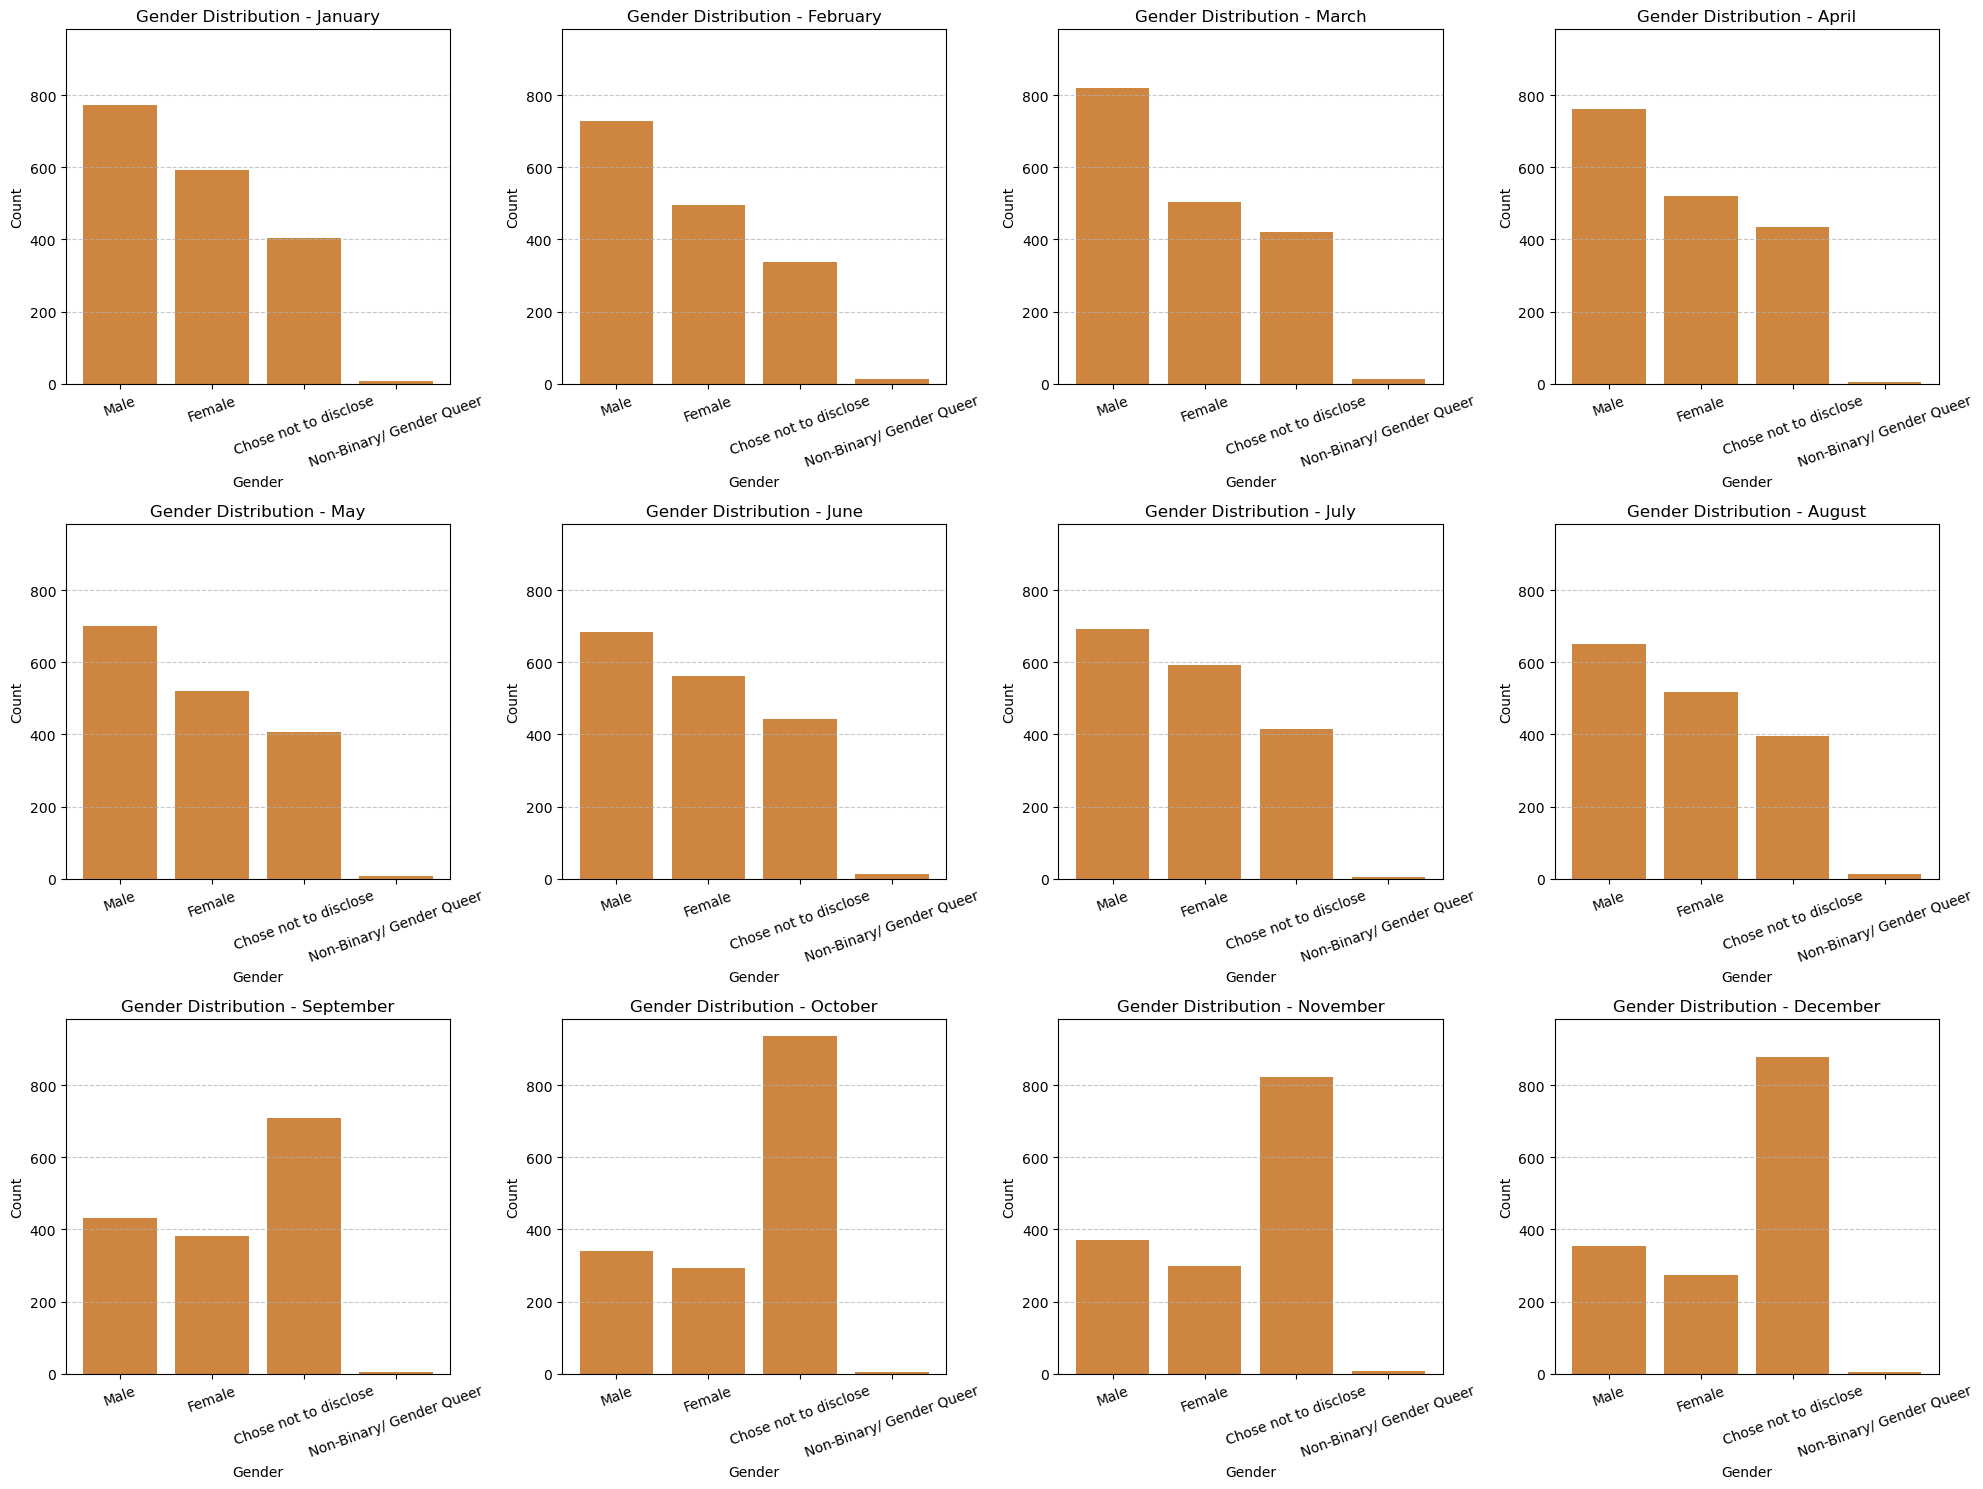

In [5]:
#monthly breakdown of gender:
gender_time_df = cahoots_data.copy()
gender_time_df['TimeOfCall'] = pd.to_datetime(gender_time_df['TimeOfCall'], errors='coerce')
gender_time_df.dropna(subset=['TimeOfCall'], inplace=True)
gender_time_df['Hour of Call'] = gender_time_df['TimeOfCall'].dt.hour
gender_time_df = gender_time_df.drop(columns=['Age','City', 'Race', 'Reason for Dispatch'])
gender_time_df['Date'] = pd.to_datetime(gender_time_df['Date'])
#time_df
# subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)

for i, month in enumerate(range(1, 13)):
    label = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']
    month_df = gender_time_df[gender_time_df['Date'].dt.month == month]
    gender_counts = month_df['Gender'].value_counts()
    ax = axes[i//4, i%4]
    ax.bar(gender_counts.index, gender_counts.values, color='peru')
    ax.set_title(f'Gender Distribution - {label[month]}')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=20)
    ax.tick_params(axis='x', which='both', labelbottom=True)
    ax.tick_params(axis='y', which='both', labelleft=True)

plt.tight_layout()
plt.show()

## Kruskal-Wallis Test: Gender vs. Call Frequency

# Find better/stronger variables!!

In [6]:
grouped = []
for i in gender_time_df['Hour of Call'].unique():
    grouped.append(gender_time_df[gender_time_df['Hour of Call']==i]['Gender'])
grouped
h_stat, p_val = kruskal(*grouped)
print(f"H statistic: {h_stat} and p-value: {p_val}")

H statistic: 114.50980453768526 and p-value: 3.999666587143319e-14


## Race:

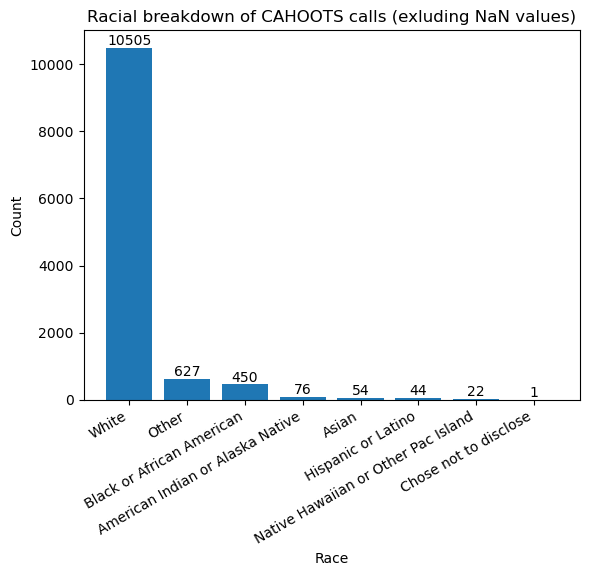

In [28]:
cahoots_data['Race'] = cahoots_data['Race'].replace('WHITE', 'White')
cahoots_data['Race'] = cahoots_data['Race'].replace('white', 'White')
cahoots_data['Race'] = cahoots_data['Race'].replace('American Indian', 'American Indian or Alaska Native')
cahoots_data['Race'] = cahoots_data['Race'].replace('Alaska Native', 'American Indian or Alaska Native')
cahoots_data['Race'] = cahoots_data['Race'].replace('Two or More Unspecified Race', 'Other')
cahoots_data['Race'] = cahoots_data['Race'].replace('Other Single Race', 'Other')
cahoots_data['Race'] = cahoots_data['Race'].replace('Other Race', 'Other')

race_counts = cahoots_data["Race"].value_counts()
na_race_counts = cahoots_data['Race'].isnull().sum() #count is 7791/19570 ≈ 0.398109351
race_counts_with_na = pd.concat([race_counts, pd.Series({'NaN': na_race_counts})])

race_counts_with_na #sanity check: race_counts_with_na.sum() = 19570 ✓
#na_race_counts
#race_counts
plt.bar(race_counts.index, race_counts.values)

for i, count in enumerate(race_counts.values):
    plt.text(i, count + 10, count, ha='center', va='bottom')

plt.title('Racial breakdown of CAHOOTS calls (exluding NaN values)')
plt.ylabel('Count')
plt.xlabel('Race')
plt.xticks(rotation=30, ha='right')
plt.show()

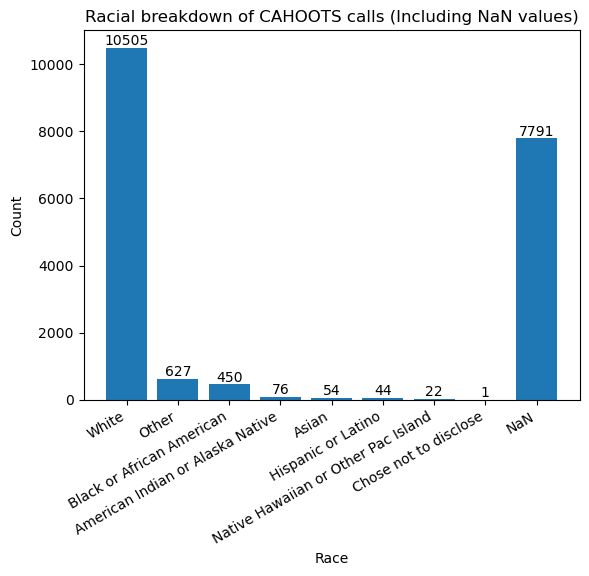

In [52]:
plt.bar(race_counts_with_na.index, race_counts_with_na.values)

for i, count in enumerate(race_counts_with_na.values):
    plt.text(i, count + 10, count, ha='center', va='bottom')

plt.title('Racial breakdown of CAHOOTS calls (Including NaN values)')
plt.ylabel('Count')
plt.xlabel('Race')
plt.xticks(rotation=30, ha='right')
plt.show()

## Age:

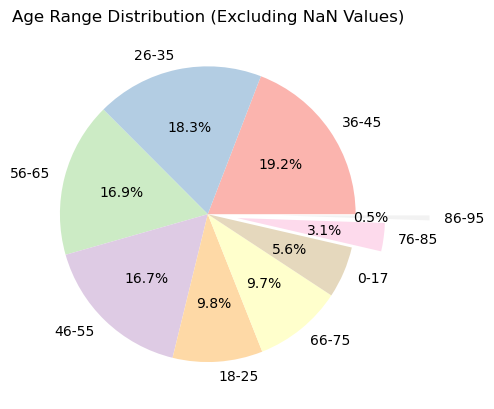

In [9]:
# age_counts = cahoots_data['Age'].value_counts()
# age_counts

age = cahoots_data['Age']
age_df = pd.DataFrame({'Age': age})
age_df['Age'] = pd.to_numeric(age_df['Age'], errors='coerce')
bins = [0, 18, 26, 36, 46, 56, 66, 76, 86, 96]
labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
age_df['Age Group'] = pd.cut(age_df['Age'], bins=bins, labels=labels, right=False)

#age_df
age_df = age_df.dropna(subset=['Age Group'])

age_counts = age_df['Age Group'].value_counts()
#age_counts

explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0.5)#make smaller section labels easier to ready

plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', explode=explode, colors=plt.cm.Pastel1.colors)
plt.title('Age Range Distribution (Excluding NaN Values)')
plt.show()

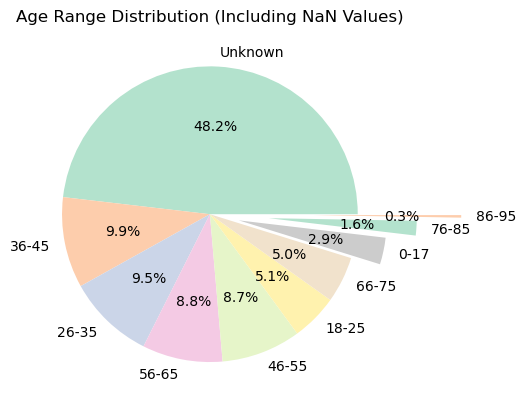

In [10]:
new_age = cahoots_data['Age']
new_age_df = pd.DataFrame({'Age': new_age})
new_age_df['Age'] = pd.to_numeric(new_age_df['Age'], errors='coerce')
bins = [np.nan, 0, 18, 26, 36, 46, 56, 66, 76, 86, 96]
labels = ['Unknown', '0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
new_age_df['Age Group'] = pd.cut(new_age_df['Age'], bins=bins, labels=labels, right=False)
new_age_df['Age Group'] = new_age_df['Age Group'].fillna('Unknown')
new_age_counts = new_age_df['Age Group'].value_counts(dropna=False)
#print(new_age_counts)
explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0.4, 0.7)#make smaller section labels easier to ready

plt.pie(new_age_counts, labels=new_age_counts.index, autopct='%1.1f%%', explode=explode, colors=plt.cm.Pastel2.colors)
plt.title('Age Range Distribution (Including NaN Values)')
plt.show()

In [11]:
#monthly breakdown of age:



## City:

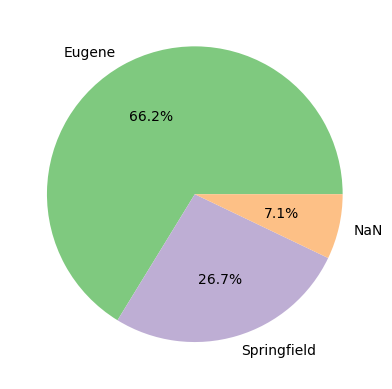

In [12]:
#PIECHART
cahoots_data['City'] = cahoots_data['City'].replace('Informatio not recorded', 'NaN')
city_counts = cahoots_data['City'].value_counts()
#city_counts

plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=plt.cm.Accent.colors)
plt.show()

## Reason for dispatch:

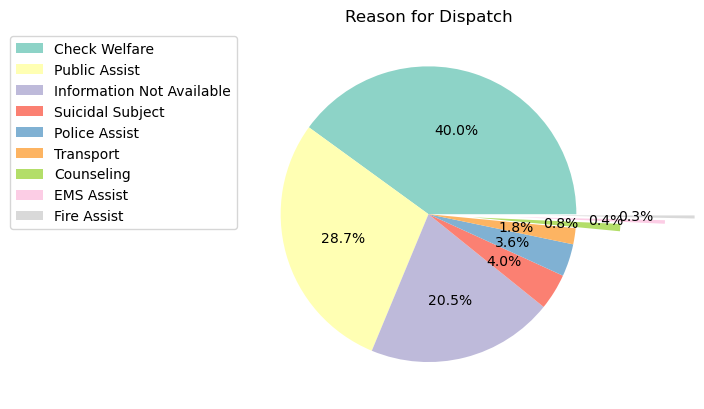

In [31]:
explode = [0, 0, 0, 0, 0, 0, 0.3, 0.6, 0.8]
dispatch_reason = cahoots_data['Reason for Dispatch'].value_counts()
patches, texts, _ = plt.pie(dispatch_reason, explode=explode, autopct='%1.1f%%', labeldistance=1.05, colors=plt.cm.Set3.colors)

# Create a legend
plt.legend(patches, dispatch_reason.index, loc=1, bbox_to_anchor=(0, 1))
plt.title('Reason for Dispatch')
plt.show()

## Time of call:

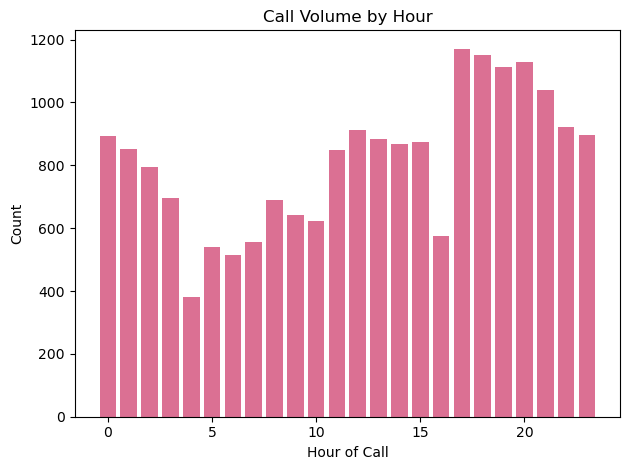

1171

In [14]:
time_df = cahoots_data.copy()
time_df['TimeOfCall'] = pd.to_datetime(time_df['TimeOfCall'], errors='coerce')
time_df.dropna(subset=['TimeOfCall'], inplace=True)
time_df['Hour of Call'] = time_df['TimeOfCall'].dt.hour
time_df = time_df.drop(columns=['Age', 'Gender', 'City', 'Race', 'Reason for Dispatch'])
#time_df
hours = time_df['Hour of Call'].value_counts()
plt.bar(hours.index, hours.values, color='palevioletred')
plt.xlabel('Hour of Call')
plt.ylabel('Count')
plt.title('Call Volume by Hour')
plt.tight_layout()
plt.show()

np.max(hours)

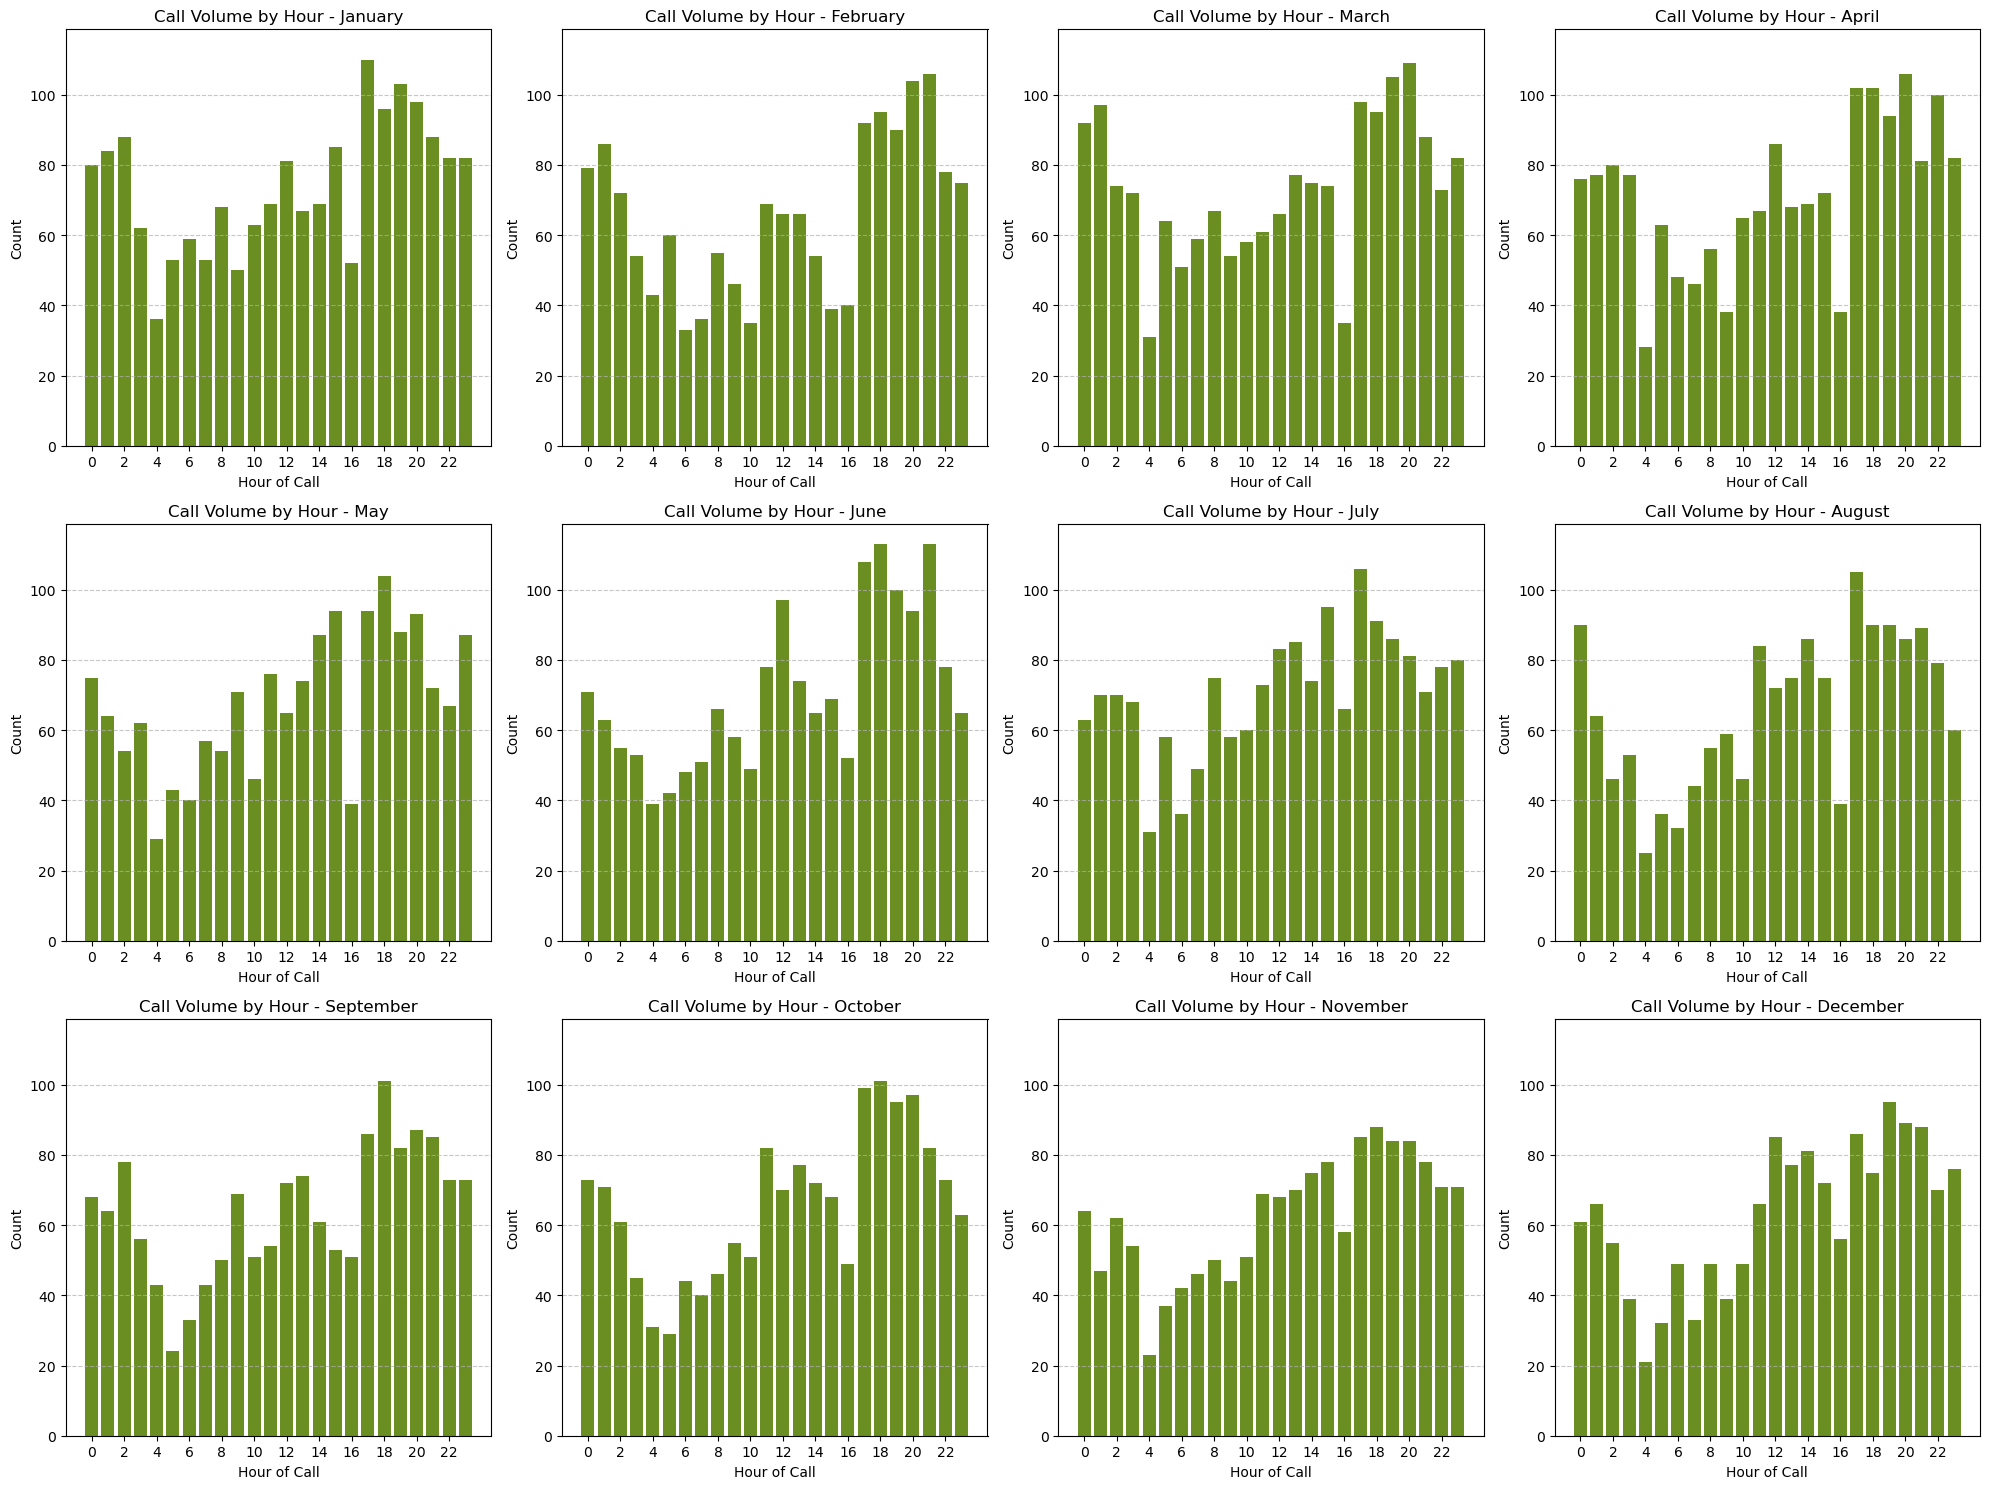

In [15]:
time_df['Date'] = pd.to_datetime(time_df['Date'])
# subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)

for i, month in enumerate(range(1, 13)):
    label = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']
    month_df = time_df[time_df['Date'].dt.month == month]
    hour_counts = month_df['Hour of Call'].value_counts().sort_index()
    ax = axes[i//4, i%4]
    ax.bar(hour_counts.index, hour_counts.values, color='olivedrab')
    ax.set_title(f'Call Volume by Hour - {label[month]}')
    ax.set_xlabel('Hour of Call')
    ax.set_ylabel('Count')
    ax.set_xticks(range(0, 24, 2))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', which='both', labelbottom=True)
    ax.tick_params(axis='y', which='both', labelleft=True)

plt.tight_layout()
plt.show()

In [16]:
# # Ex: graph one month (March)
# march_df = time_df[time_df['Date'].dt.month == 3]
# hour_counts_march = march_df['Hour of Call'].value_counts().sort_index()
# plt.bar(hour_counts_march.index, hour_counts_march.values, color='olivedrab')
# plt.title('Call Volume by Hour - March')
# plt.xlabel('Hour of Call')
# plt.ylabel('Count')
# plt.xticks(range(0, 24, 2))
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

## Most/least frequent call hour sorted by month:

In [49]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']
def get_hourly_counts(df, month):
    return df[df['Date'].dt.month == month]['Hour of Call'].value_counts().sort_index()

#max:
hourly_counts = [get_hourly_counts(time_df, month) for month in range(1, 13)]
# for month in range(1,13):
#     if not hourly_counts[month - 1].empty:
#         max_hour = hourly_counts[month-1].idxmax()
#         max_vol = hourly_counts[month-1].max()
#         print(f"In {month_names[month - 1]}, the maximum call volume is {max_vol} at hour {max_hour}.")
months = []
max_hour = []
max_vol = []

In January, the maximum call volume is 110 at hour 17.
In February, the maximum call volume is 106 at hour 21.
In March, the maximum call volume is 109 at hour 20.
In April, the maximum call volume is 106 at hour 20.
In May, the maximum call volume is 104 at hour 18.
In June, the maximum call volume is 113 at hour 18.
In July, the maximum call volume is 106 at hour 17.
In August, the maximum call volume is 105 at hour 17.
In September, the maximum call volume is 101 at hour 18.
In October, the maximum call volume is 101 at hour 18.
In November, the maximum call volume is 88 at hour 18.
In December, the maximum call volume is 95 at hour 19.


In [50]:
#min:
hourly_counts = [get_hourly_counts(time_df, month) for month in range(1, 13)]
for month in range(1,13):
    if not hourly_counts[month - 1].empty:
        min_hour = hourly_counts[month-1].idxmin()
        min_vol = hourly_counts[month-1].min()
        print(f"In {month_names[month - 1]}, the minimum call volume is {min_vol} at hour {min_hour}.")

In January, the minimum call volume is 36 at hour 4.
In February, the minimum call volume is 33 at hour 6.
In March, the minimum call volume is 31 at hour 4.
In April, the minimum call volume is 28 at hour 4.
In May, the minimum call volume is 29 at hour 4.
In June, the minimum call volume is 39 at hour 4.
In July, the minimum call volume is 31 at hour 4.
In August, the minimum call volume is 25 at hour 4.
In September, the minimum call volume is 24 at hour 5.
In October, the minimum call volume is 29 at hour 5.
In November, the minimum call volume is 23 at hour 4.
In December, the minimum call volume is 21 at hour 4.


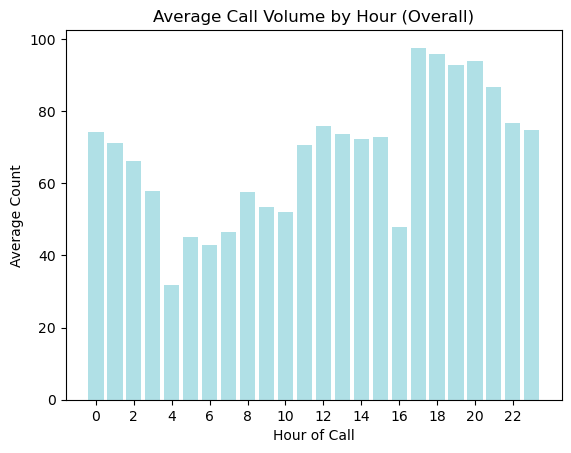

In [21]:
# time_df
# time_df['Hour of Call'].value_counts()
total_counts = time_df.groupby('Hour of Call').size()
# total_counts
average_counts = total_counts / 12
plt.bar(average_counts.index, average_counts.values, color='powderblue')
plt.title('Average Call Volume by Hour (Overall)')
plt.xlabel('Hour of Call')
plt.ylabel('Average Count')
plt.xticks(range(0, 24, 2))
plt.show()

## Heatmap: Frequency of calls by hour & month

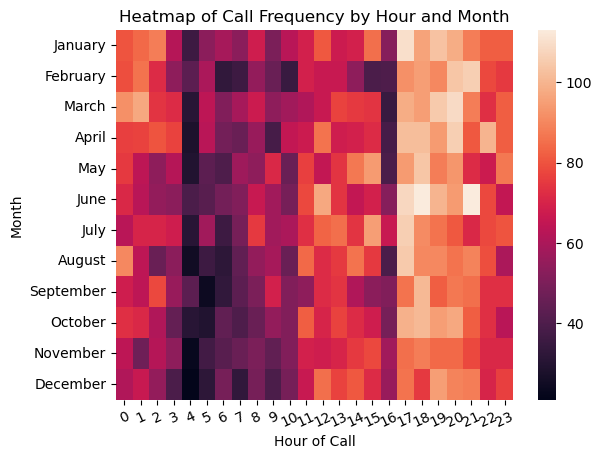

In [93]:
heatmap_data = time_df.pivot_table(index=time_df['Date'].dt.month, columns='Hour of Call', aggfunc='size', 
                                   fill_value=0)
#month_names defined above
sns.heatmap(heatmap_data)
plt.title('Heatmap of Call Frequency by Hour and Month')
plt.xlabel('Hour of Call')
plt.ylabel('Month')
plt.xticks(rotation=25, ha='center')
plt.yticks(ticks=np.arange(12) + 0.5, labels=month_names, rotation=0)
plt.show()

## Chi-Squared Test: 
Does gender distribution vary significantly by month?

In [75]:
cahoots_data['Date'] = pd.to_datetime(cahoots_data['Date'], errors='coerce')
cahoots_data['Gender'] = cahoots_data['Gender'].str.capitalize()
contingency_table = pd.crosstab(cahoots_data['Gender'], cahoots_data['Date'].dt.month)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}, p-value: {p}")

Chi-Square statistic: 4065.2238524750574, p-value: 0.0


There is significant deviation between the observed and expected frequencies in the contingency table. This means there is a considerable difference in the distribution of genders across different months. P-value is ~0, reject null hypthesis, which signifies that the observed differences are statistically significant. **There is strong evidence to suggest that the gender distribution varies significantly by month.**

## Kruskal-Wallis Test: Age and Type of Call

In [67]:
grouped_ages_by_call = [cahoots_data[cahoots_data['Reason for Dispatch'] == call_type]['Age'].dropna() for call_type in cahoots_data['Reason for Dispatch'].unique()]
h_stat, p_val = kruskal(*grouped_ages_by_call)
print(f"Kruskal-Wallis H statistic: {h_stat}, p-value: {p_val}")

Kruskal-Wallis H statistic: 872.5612318790679, p-value: 4.6759750806389335e-183


strong relationship between the type of dispatch call and the age of individuals involved!

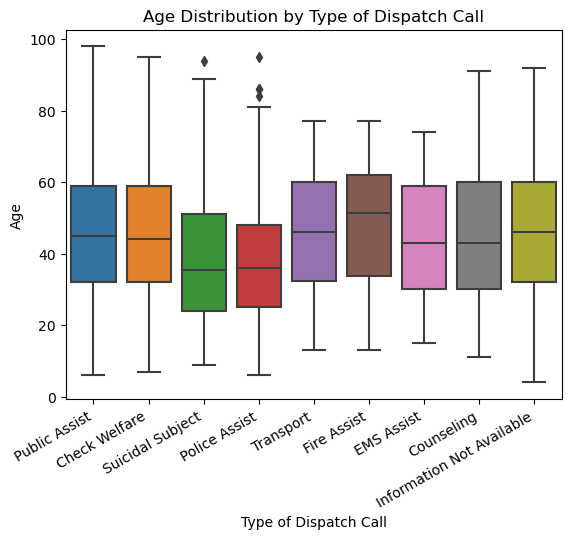

In [74]:
cahoots_data['Age'] = pd.to_numeric(cahoots_data['Age'], errors='coerce')
cahoots_data.dropna(subset=['Age', 'Reason for Dispatch'], inplace=True)
sns.boxplot(x='Reason for Dispatch', y='Age', data=cahoots_data)
plt.xticks(rotation=30, ha='right')
plt.title('Age Distribution by Type of Dispatch Call')
plt.xlabel('Type of Dispatch Call')
plt.ylabel('Age')
plt.show()

# Census data:

Census data [here](https://www.census.gov/quickfacts/fact/table/springfieldcityoregon,eugenecityoregon/POP060210).

In [23]:
#total demographic breakdown:
census_data = pd.read_csv('Eugene-SpringfieldCensus.csv')
#census_data
spring_pop = census_data[census_data['Fact'] == 'Population Estimates, July 1, 2022, (V2022)'].iloc[0,2]
eug_pop = census_data[census_data['Fact'] == 'Population Estimates, July 1, 2022, (V2022)'].iloc[0,4]
#print(f"Springfield population (as of 2022): {spring_pop}\nEugene population (as of 2022): {eug_pop}")
spring_pop = int(spring_pop.replace(',', ''))
eug_pop = int(eug_pop.replace(',', ''))

print(f"Springfield population: {spring_pop}\nEugene population: {eug_pop}")

Springfield population: 61400
Eugene population: 177923


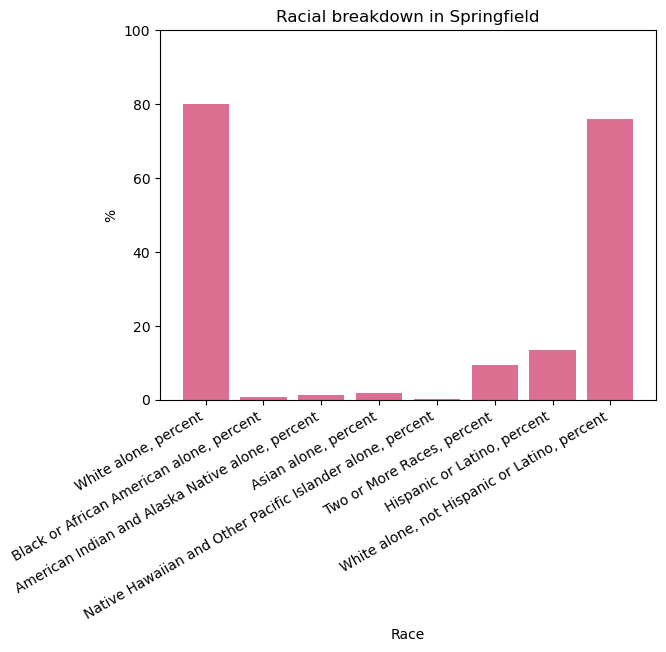

In [24]:
#racial breakdown:
spring_race = census_data.loc[12:19][['Fact','Springfield city, Oregon']]
eug_race = census_data.loc[12:19][['Fact','Eugene city, Oregon']]
#spring_race, eug_race

spring_race_percent = spring_race['Springfield city, Oregon'].str.rstrip('%').astype(float)
eug_race_percent = eug_race['Eugene city, Oregon'].str.rstrip('%').astype(float)

plt.xticks(rotation=30, ha='right')
plt.ylim(0, 100)
plt.bar(spring_race['Fact'], spring_race_percent, label='Springfield', color='palevioletred')
plt.title('Racial breakdown in Springfield')
plt.ylabel('%')
plt.xlabel('Race')
plt.show()

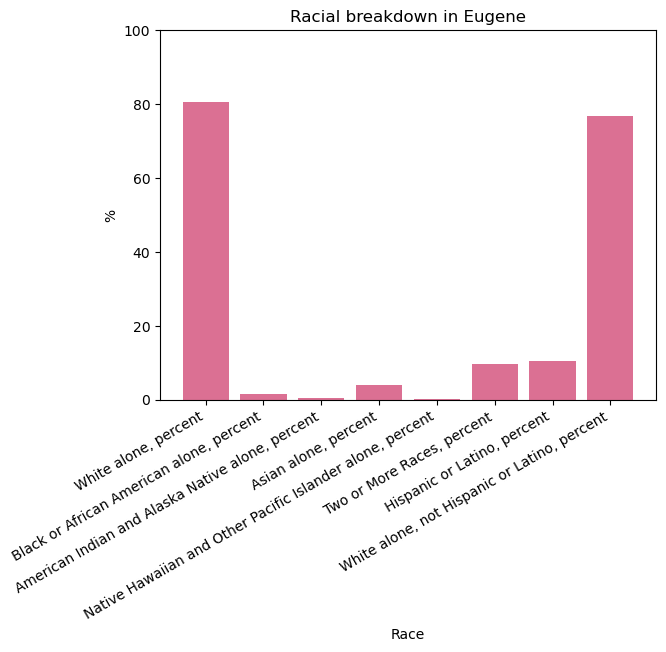

In [25]:
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 100)
plt.bar(eug_race['Fact'], eug_race_percent, label='Eugene', color='palevioletred')
plt.title('Racial breakdown in Eugene')
plt.ylabel('%')
plt.xlabel('Race')
plt.show()